In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

#Minhas Bibliotecas
import DatasetAnalise as faa
import CreateVariables as facv
import SolveNullsAndPreparationData as fanp
import ModelsAdvancedAnalysis as fam

from sklearn import tree

#pip install pydotplus
#pip install graphviz
#conda install python-graphviz
import os
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:\\Users\\alexa\\anaconda3\\Library\\bin\\graphviz'

import random
import sys

2020-07-01 15:45:27,555 [INFO]  NumExpr defaulting to 4 threads.


# Carrega as bases necessárias

In [2]:
versao = '_v1t'
nome_alvo = 'Survived'

#Dados de entradas de treino
df = pd.read_csv('bases/train' + versao + '.csv')

#Coloca a coluna de resposta no final
df = faa.colocaAlvoComeco(df, nome_alvo)

#Dados de entrada de teste
df_test = pd.read_csv('bases/test' + versao + '.csv')

#Dados das soluções dos dados de teste (modelo de submissão)
df_gender = pd.read_csv('submissoes/gender_submission.csv')

#Faz as coisas serem realmente aleatórias
seedValue = random.randrange(sys.maxsize)
random.seed(seedValue)

#Configura parâmetros estatísticos
num_loop = 20

#Configura se iremos usar algum tipo de balanceamento nas divisões entre treino e validação
balanced = 2

# Cria variaveis extra

In [3]:
#Categoriza usando o critério MDL
#Note que a divisão do MDL pode mudar se recebermos novos dados de entrada para treino

#lista_categorizar = ['Age', 'Fare']
#df, df_test = facv.createCategozation(df, df_test, lista_categorizar, nome_alvo)

In [4]:
#Cria variaveis expandidas em termos de série de Taylor ou de Laurent
usar_laurent = True
ordem_max = 3
colunas_numericas = ['Age', 'Fare', 'Size_Family', 'Equal_Ticket', 'Age_max', 'Age_min']
df = facv.expandVariables(df, df_test, colunas_numericas, laurent = usar_laurent, order = ordem_max)
df_test = facv.expandVariables(df_test, df, colunas_numericas, laurent = usar_laurent, order = ordem_max)

In [5]:
#Cria combinações bizarras de variáveis hahahaha
#df, df_test = facv.criarVariaveisMagicas(df, df_test)

In [6]:
#Cria as variaveis do PCA até a ordem desejada (note que não pode ter colunas com valores nulos para fazer isso)
#Note que é bom não fazer, pois é uma variavel que precisa ser recriada e o modelo retreinado
#sempre que temos novos valores de entrada

#num_comp = 5
#colunas_interesse = ['Age', 'Fare', 'Size_Family', 'Equal_Ticket', 'Age_max', 'Age_min']
#df, df_test = facv.createPCAVariables(df, df_test, colunas_interesse, num_comp)

# Transformações das variáveis

In [7]:
#Standarização
#Note que é bom não fazer, pois a transformação precisa ser refeita e o modelo retreinado
#sempre que temos novos valores de entrada

#colunas_numericas = ['Age', 'Fare', 'Size_Family', 'Equal_Ticket', 'Age_max', 'Age_min']
#df, df_test = fanp.standarizaVariaveis(df, df_test, colunas_numericas)

#  Cria base auxiliar para o modelo com nulos

In [8]:
#Específico para o problema do titanic
df_aux = fanp.removeVarsCabins(df).copy()
df_test_aux = fanp.removeVarsCabins(df_test).copy()

# Filtro de variaveis - Decision Tree

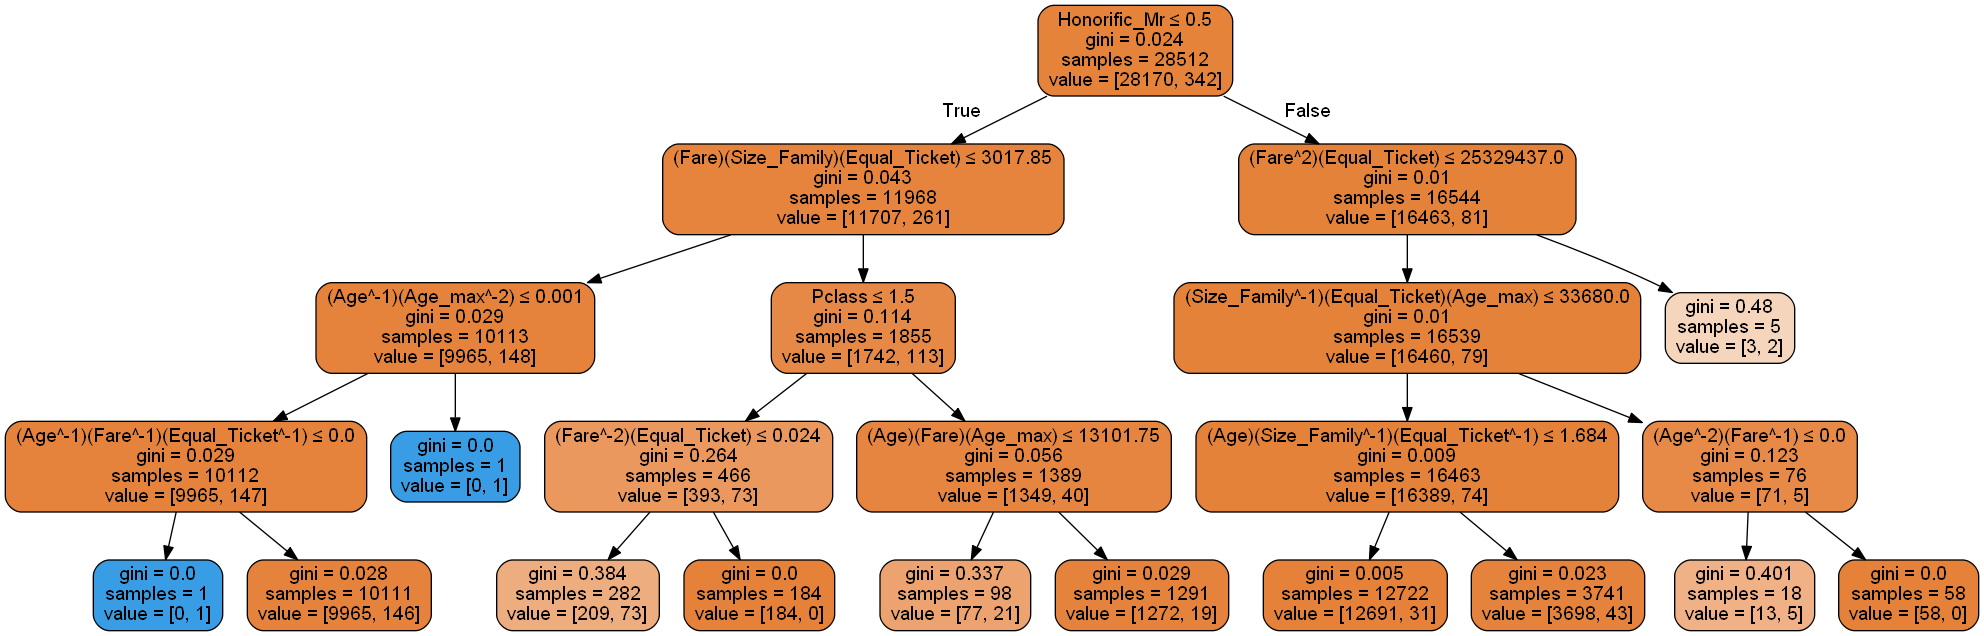

In [9]:
#clf_dt1 = tree.DecisionTreeClassifier()
clf_dt1 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 10)
clf_dt1 = clf_dt1.fit(df_aux.drop(nome_alvo, axis = 1), df_aux[nome_alvo])

dot_data = StringIO()
export_graphviz(clf_dt1, out_file = dot_data,  filled = True, rounded = True, special_characters = True,
               feature_names = list(df_aux.drop(nome_alvo, axis = 1).columns))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

'Progress: [####################] 98.6% Time Left: 0.13 min'

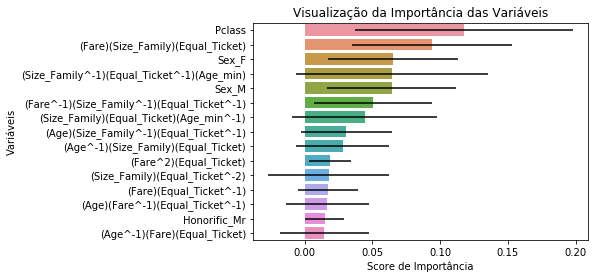

****Avaliação Meio a Meio****
----------------------
Acurácia Treino: 98.8 ± 0.0
Acurácia Validação: 98.7 ± 0.0
Queda de Acurácia: 0.1 ± 0.1
----------------------
ROC Treino: 53.1 ± 2.3
ROC Validação: 50.9 ± 0.9
Queda de ROC: 2.2 ± 1.7


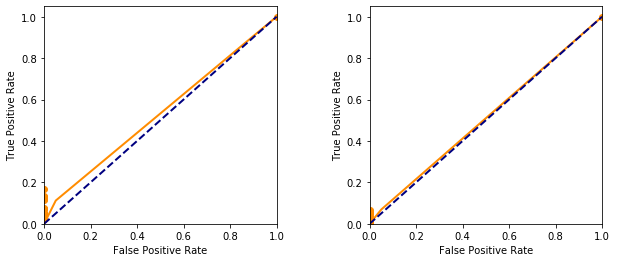

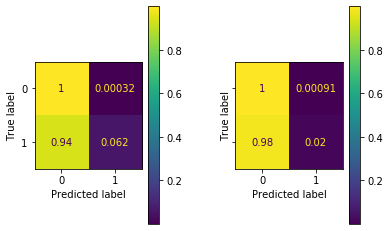

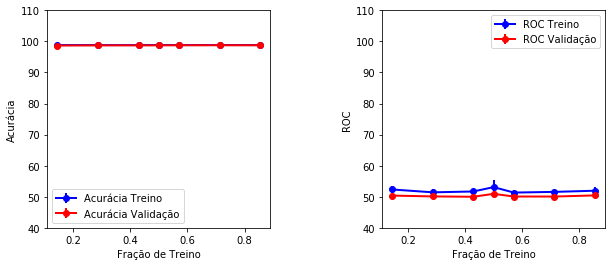

---------Valores Esperados---------
Acurácia: 98.7 ± 0.0
ROC: 48.7 ± 2.4
Fator de Qualidade: nan ± 0


In [10]:
_, df_impor = fam.avaliaModelos([clf_dt1], df_aux, nome_alvo, balanced, num_loop, flag_print = True)

In [11]:
#Filtra as variaveis mais importantes ou carrega se já tiver pronto
corte_importancia = 0.80 #Define até qual soma de importância vamos manter as variaveis

#Pega todas as variaveis até somar 80% da importância com 95% de confiança (dois desvios padrões)
worst_vars = df_impor[df_impor['acum'] - 2*df_impor['acum_error'] > corte_importancia]
worst_vars = list(worst_vars.index)    
    
df = df.drop(worst_vars, axis = 1)
df_test = df_test.drop(worst_vars, axis = 1)

In [12]:
df = faa.colocaAlvoComeco(df, nome_alvo)

df.to_csv('bases/train_processado' + versao + '.csv', index = False)
df_test.to_csv('bases/test_processado' + versao + '.csv', index = False)

print('Quantidade de Variáveis que sobraram: ' + str(len(df.columns) - 1))

Quantidade de Variáveis que sobraram: 41


In [13]:
df

,Survived,Pclass,Ticket_num,Cabin_quant,Cabin_num,Cabin_dist,Sex_F,Sex_M,Ticket_pref_PC,Ticket_pref_SC,...,(Size_Family)(Equal_Ticket)(Age_min^-1),(Age)(Fare)(Age_max^-1),(Equal_Ticket^2)(Age_min),(Fare)(Size_Family)(Equal_Ticket),(Age)(Fare)(Equal_Ticket),(Size_Family^-2)(Equal_Ticket),(Equal_Ticket^-2)(Age_min^-1),(Age)(Fare)(Equal_Ticket^-1),(Size_Family)(Equal_Ticket^-2),(Fare)(Equal_Ticket^-1)(Age_max)
0,0,3,21171.0,NaN,NaN,NaN,0,1,0,0,...,8.000000,2.262411,4096.00,232.0000,5104.0000,32.0,0.000244,4.984375,0.000977,15.972656
1,1,1,17599.0,1.0,85.0,1.0,1,0,1,0,...,49.253731,44.405990,729.63,2352.3489,89389.2582,33.0,0.001371,82.083800,0.000918,131.766100
2,1,3,3101282.0,NaN,NaN,NaN,1,0,0,0,...,38.095238,2.784459,430.08,126.8000,6593.6000,128.0,0.002325,6.439062,0.000488,18.326562
3,1,1,113803.0,1.0,123.0,1.0,1,0,0,0,...,69.565217,32.043103,3768.32,3398.4000,118944.0000,64.0,0.000265,29.039062,0.000244,48.121875
4,0,3,373450.0,NaN,NaN,NaN,0,1,0,0,...,8.000000,5.418269,2048.00,128.8000,9016.0000,128.0,0.000488,8.804688,0.000488,13.081250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,0,2,29750.0,NaN,NaN,NaN,0,1,0,0,...,43.333333,9.230769,3168.75,975.0000,39000.0000,260.0,0.000316,9.230769,0.000118,30.000000
28508,0,3,113505.0,NaN,NaN,NaN,1,0,0,0,...,38.554217,4.446721,3399.68,248.0000,17360.0000,256.0,0.000294,4.238281,0.000122,7.386719
28509,0,1,17593.0,NaN,NaN,NaN,1,0,1,0,...,32.000000,53.882492,4096.00,2629.4656,210357.2480,256.0,0.000244,51.356750,0.000122,78.319044
28510,0,3,230080.0,1.0,47.0,0.0,0,1,0,0,...,71.641791,0.113380,6174.72,386.4000,772.8000,384.0,0.000162,0.083854,0.000054,5.953646
